In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [33]:
data = pd.read_csv('data_for_lr.csv')

In [34]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


###### handling Null Values

In [36]:
data.isnull().sum()

x    0
y    1
dtype: int64

## Data Processing

In [37]:
data = data.dropna()
print("Shape of the data ", data.shape)

Shape of the data  (699, 2)


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting of Data

In [60]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# Validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color = 'green'> Linear Regression</font>

# Forward Propagation

##### f(x) = m*x + c

In [48]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m, train_input) + c

    return predictions

# Cost Function

###### sumation ((1/2n)* (y - f(x))^2)

In [41]:
def cost_function(prediction, train_output):

    cost = np.mean((train_output - prediction)**2) * 0.5
    return cost

# Gradient Descent for Backpropagation

df = (f(x) - y)/n

dm = df * x

dc = df * 1

In [52]:
def backward_propagation(train_input, train_output,predictions):

    derivatives = dict()

    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

# Update Parameters

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [43]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters

# Model Tarining

In [61]:
def train(train_input, train_output, learning_rate, iters):
    # random Parameters

    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss = list()
    
    # iteration
    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)

        # cost
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print(f"Iteration = {i + 1}, loss = {cost}")

        # plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label = 'Original')
        ax.plot(train_input, predictions, '*', label = 'Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)


    return parameters, loss
    

# Training

Iteration = 1, loss = 12.601663176984617


<Figure size 640x480 with 0 Axes>

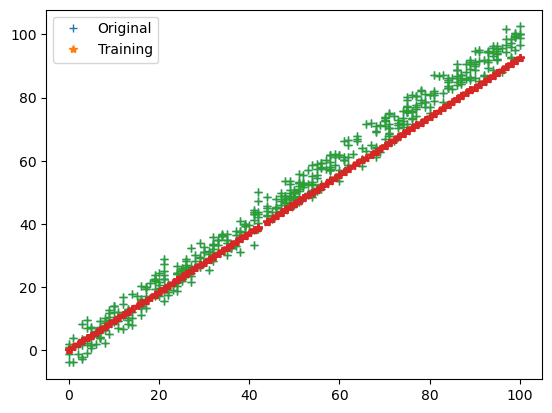

Iteration = 2, loss = 7.860298793936644


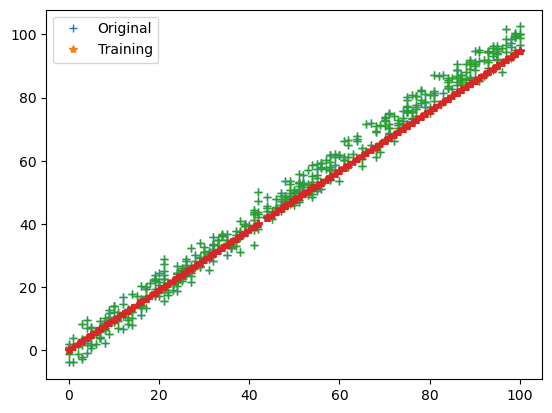

Iteration = 3, loss = 5.709136184884225


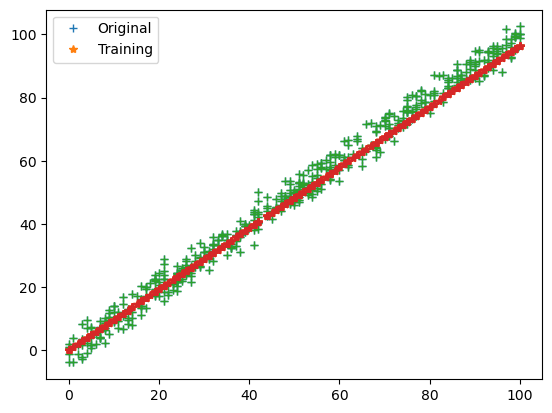

Iteration = 4, loss = 4.7331509897247805


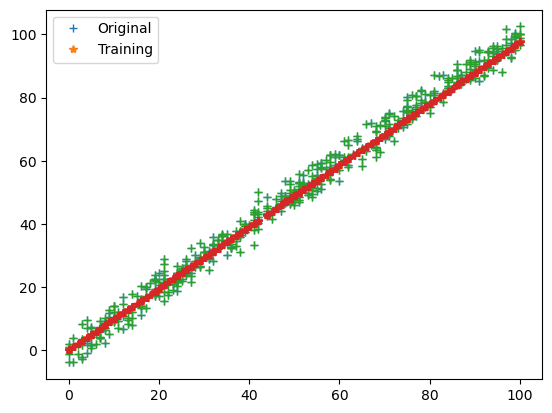

Iteration = 5, loss = 4.290345088940488


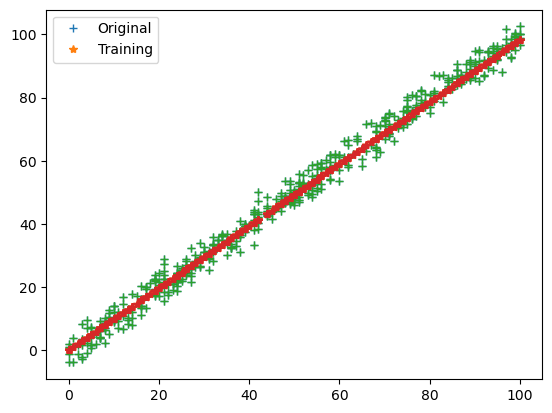

Iteration = 6, loss = 4.089443224602521


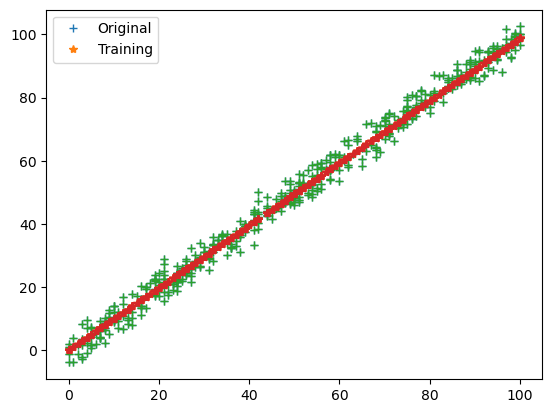

Iteration = 7, loss = 3.9982934895600937


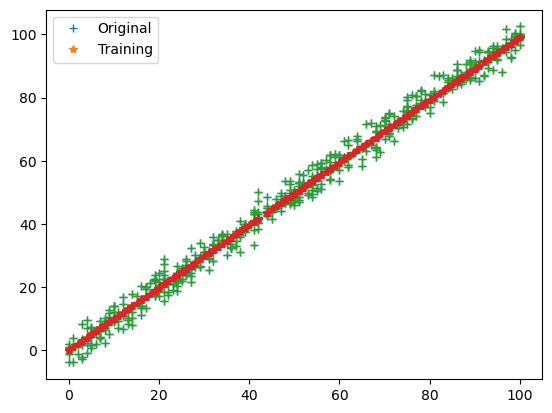

Iteration = 8, loss = 3.9569384171619935


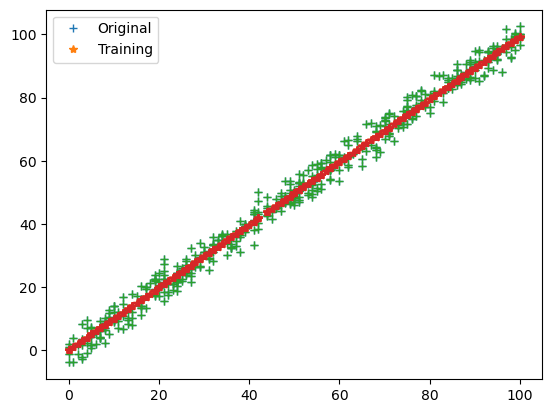

Iteration = 9, loss = 3.938175238377203


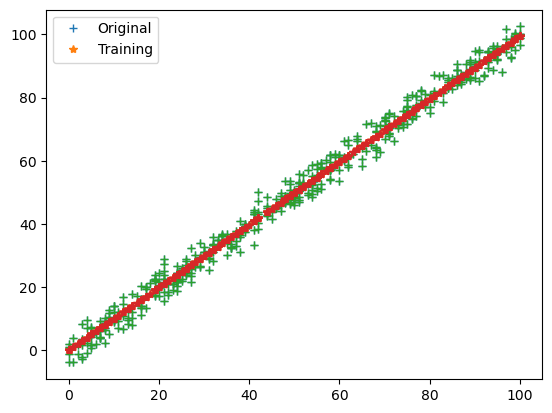

Iteration = 10, loss = 3.9296620267654414


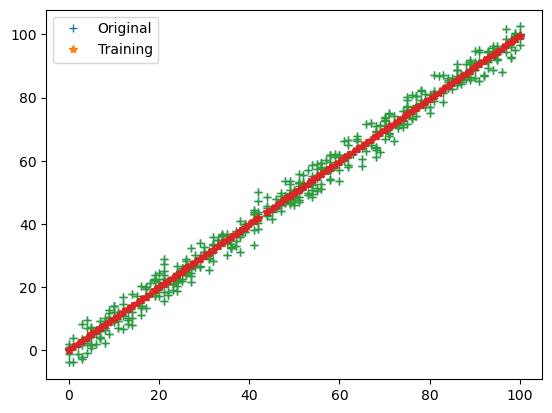

Iteration = 11, loss = 3.925799236630325


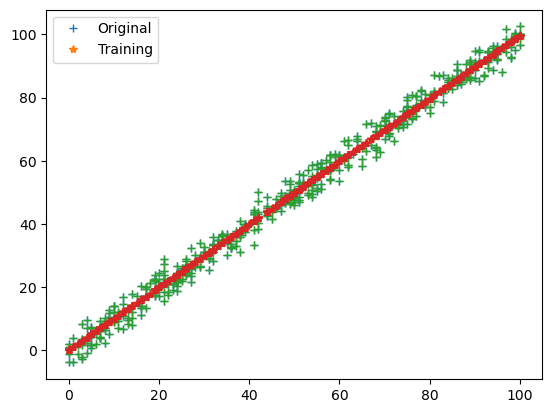

Iteration = 12, loss = 3.9240463478871157


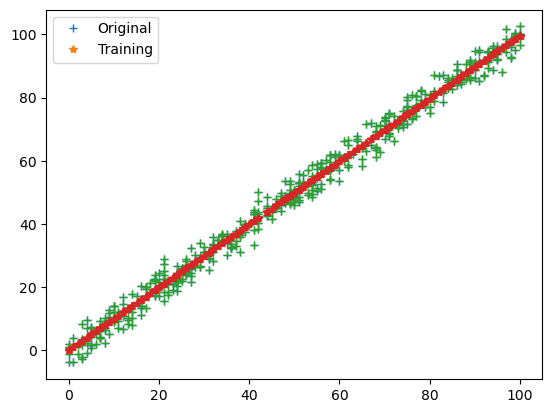

Iteration = 13, loss = 3.9232507237593843


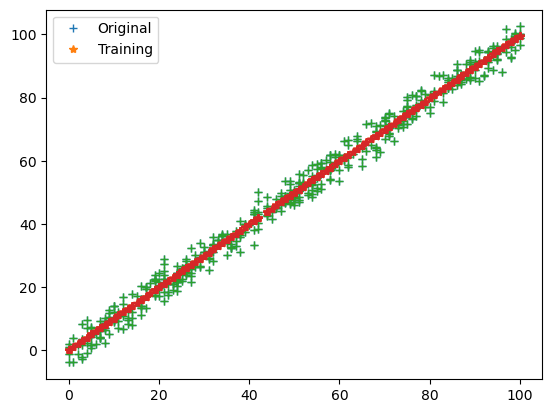

Iteration = 14, loss = 3.9228894116649538


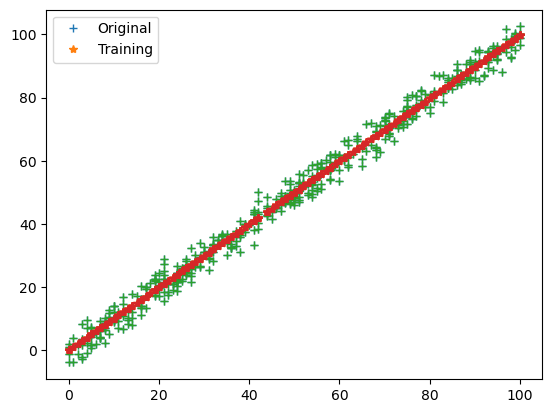

Iteration = 15, loss = 3.922725147438048


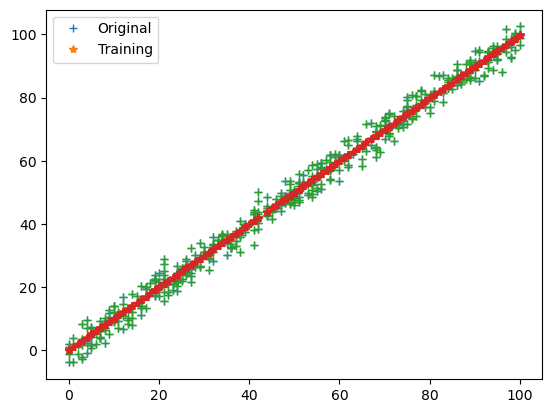

Iteration = 16, loss = 3.9226502840638475


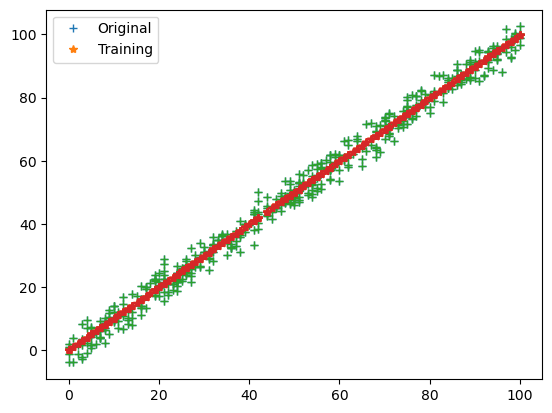

Iteration = 17, loss = 3.9226159819724953


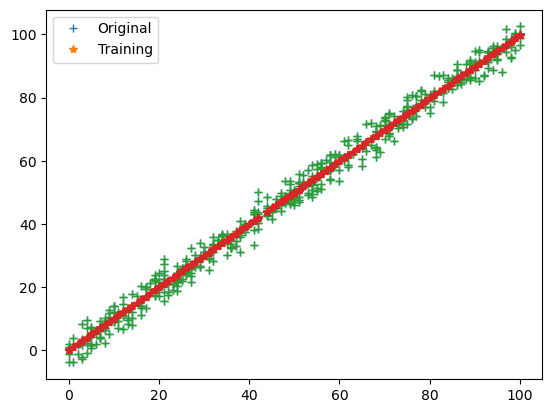

Iteration = 18, loss = 3.9226000825970493


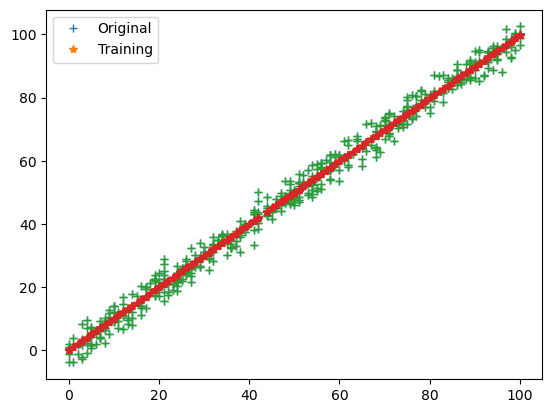

Iteration = 19, loss = 3.9225925325711413


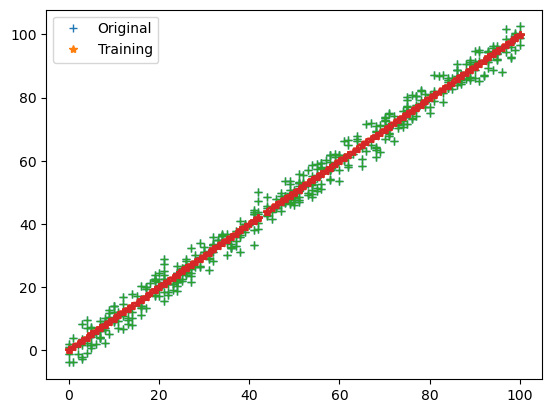

Iteration = 20, loss = 3.922588770671319


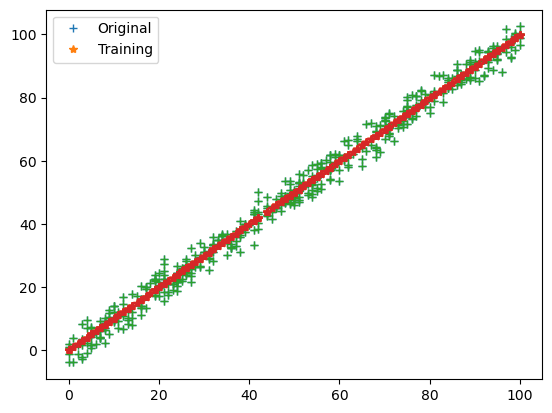

In [62]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [63]:
print(parameters)

{'m': 0.9962553251776883, 'c': 0.07549925686856292}


In [64]:
loss


[12.601663176984617,
 7.860298793936644,
 5.709136184884225,
 4.7331509897247805,
 4.290345088940488,
 4.089443224602521,
 3.9982934895600937,
 3.9569384171619935,
 3.938175238377203,
 3.9296620267654414,
 3.925799236630325,
 3.9240463478871157,
 3.9232507237593843,
 3.9228894116649538,
 3.922725147438048,
 3.9226502840638475,
 3.9226159819724953,
 3.9226000825970493,
 3.9225925325711413,
 3.922588770671319]

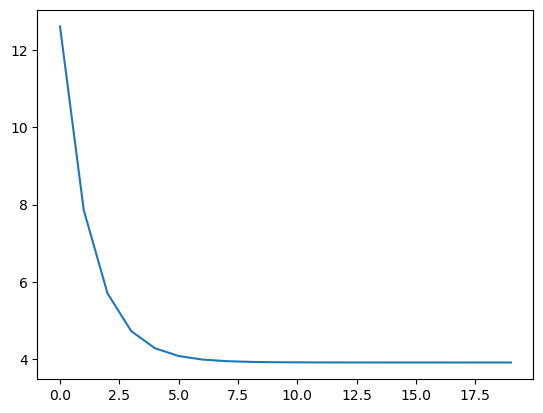

In [65]:
plt.plot(loss)

# Let's Predict

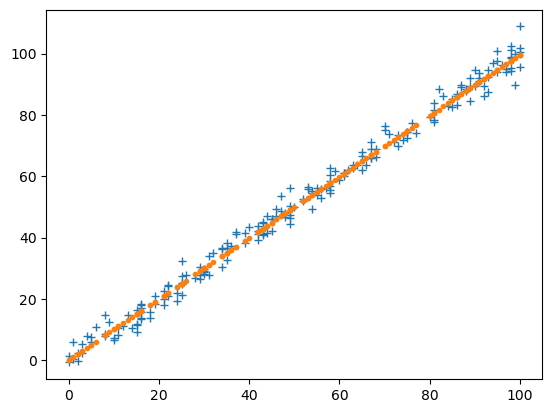

In [66]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for test data

In [67]:
cost_function(test_predictions, test_output)

3.9931711915503603